<b><center>Newton's Method for Optimization</center></b>

Newton's method is derived from the solving for x in a multivariate taylor expansion, the equation is as follows 

$$
  x_{n+1} = x_{n} - H(x_{n})^{-1} \nabla f(x_{n})
$$

where 
- $ x_{n} $ is the current point
- $  H(x_{n})^{-1} $ is the inverse hessian
- $ \nabla f(x_{n}) $ is the gradient

<b><center>Advantages</center></b> 
- The formula is extremely useful for quadratic functions, as the solution is found in one step
- The hessian matrix adaptively chooses a step size

<b><center>Disadvantages</center></b> 
- Requires computing the Hessian matrix each iteration, newton's method is impossible if the hessian doesn't exist or isn't invertable

<b><center>Importing necessary libraries</center></b>


- Numpy is used for linear algebra operations and graphing the contour plot
- Numdifftools is used for gradient and hessian calculations
- Matplotlib is used solely to graph the points and contour plot

In [3]:
%matplotlib inline
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt

Basic initalization of the function, a function to determine if the hessian is  positive definite, and setting inital variables 

In [30]:
def func(x):
    return 3*x[0]**2-2*x[0]*x[1]+x[1]**2+x[0]

def f(x,y):
    return 3*x**2-2*x*y+y**2+x

def positive_definite(x):
    return np.all(np.linalg.eigvals(x) > 0)

x0 = np.array([1,1])
positive_def = False
iterations = 2


xs = np.zeros((iterations+1, 2))
xs[0] = x0

v_func = np.vectorize(f) 

x, y = np.meshgrid(np.linspace(-5, 5, 100),
                   np.linspace(-5, 5, 100))

Runs newtons method through an initalized amount of iterations

Convergence conditions met, the minimum is [-0.25 -0.25]


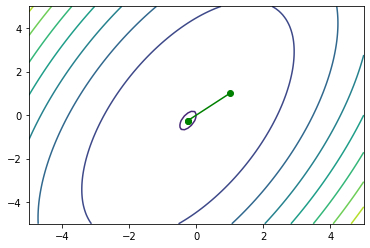

In [33]:
for i in range(iterations):
    grad = nd.Gradient(func)
    grad = grad(xs[i])
    hess = nd.Hessian(func)
    hess = hess(xs[i])
    inv_hess = np.linalg.inv(hess)

    
    xs[i+1] = xs[i] - np.dot(grad,inv_hess)
    

    positive_def = positive_definite(hess)
    

    if np.array_equal(grad, [0, 0]) == True and positive_def == True :
        print("Convergence conditions met, the minimum is {}".format(xs[i+1]))
        
        fig, ax = plt.subplots(1)
        plt.plot(xs[:,0],xs[:,1],'g-o')
        ax.contour(x, y, v_func(x, y))
        plt.show()